<a href="https://colab.research.google.com/github/GGU940/fitWeather_backend/blob/main/team_pj_11/10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 처리 - 나영

In [2]:
## 저번에 와르르 실행시키는 셀을 아래쪽에 만들었었는데
## 그게 더 번거로운 거 같아서 그냥 각 셀마다 넣어놨습니다!!
## 위에서부터 차례로 하나씩 하면 됩니다

##맨 처음에 꼭 content 폴더에 kaggle.json을 옮겨놔주세요. (원래 있는 sample_data폴더랑 형제가 되도록))

## 주요 수정 사항 ##
# 압축 해제한거를 굳이 새로 카피할 필요가 없어져서 르네상스_식민주의 폴더만 '르네상스'로 이름 변경 & 하위폴더에 식민주의 관련 파일들 삭제만 함
# 클래스별 500개씩 , 128*128 사이즈 (MobileNetV2 표준)

In [3]:
#설치 모음
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import random
import os # 'os' 라이브러리: 파일 경로를 다루거나, 디렉토리를 만들고, 파일 목록을 읽는 등 운영체제와 관련된 기능을 제공
from pathlib import Path
import shutil   # 'shutil' 라이브러리: 파일 복사, 이동, 삭제 등 파일 작업 도움

import matplotlib.pyplot as plt # 데이터를 그래프로 시각화
import matplotlib.image as mpimg
import pandas as pd # 데이터를 표(테이블) 형태로
from PIL import Image

In [4]:
root_path = Path('/content')
dataset_path = Path(root_path/'dataset') #데이터셋 폴더 경로
print(dataset_path)

/content/dataset


In [5]:
###리셋용 : 아마 쓸일 없을 텐데 쓴다면 필요한 부분만 주석 취소하고..
def reset():
  # shutil.rmtree("/content/dataset")
  # !rm -rf /content/
  !rm -rf /content/dataset/
  # !rm -rf /content/Capstone_Architectural_Styles_dataset/
  # !rm -rf /content/data/architectural-styles-periods-dataset.zip

  # print("기존 폴더 삭제 완료.")

reset()

In [6]:
### 캐글 api설치 ~ 데이터셋 다운,압축해제,압축파일삭제 ~ 폴더명변경
def InitialSettings():
  !pip install kaggle #kaggle 라이브러리 설치
  !mkdir -p ~/.kaggle #kaggle 폴더 생성
  if os.path.exists('kaggle.json'):
    !cp kaggle.json ~/.kaggle/ #폴더에 kaggle.json 파일 복사
    !chmod 600 ~/.kaggle/kaggle.json #kaggle.json 파일 권한 설정

    if os.path.exists('/root/.kaggle/kaggle.json'):
        !kaggle datasets download -d gustavoachavez/architectural-styles-periods-dataset -p {root_path}  #데이터셋 다운로드
        !unzip {root_path}/architectural-styles-periods-dataset.zip -d {root_path}  #데이터셋 압축 해제

        !rm -rf {root_path}/sample_data #원래 있는 샘플데이터 폴더 삭제
        !rm -rf {root_path}/architectural-styles-periods-dataset.zip #압축zip파일 삭제

        if os.path.exists(f'{root_path}/Capstone_Architectural_Styles_dataset'):
            !mv {root_path}/Capstone_Architectural_Styles_dataset {root_path}/dataset #파일명 dataset으로 변경
        else:
            print("Capstone_Architectural_Styles_dataset 폴더 없음")
    else:
        print("Kaggle API key file 없음 /root/.kaggle/kaggle.json.")
  else:
      print("kaggle.json 없음. 파일 업로드 했는지 확인.")


###실행
InitialSettings()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/Capstone_Architectural_Styles_dataset/Modernism/Chicago school architecture/5320.jpg  
  inflating: /content/Capstone_Architectural_Styles_dataset/Modernism/Chicago school architecture/53200.jpg  
  inflating: /content/Capstone_Architectural_Styles_dataset/Modernism/Chicago school architecture/53201.jpg  
  inflating: /content/Capstone_Architectural_Styles_dataset/Modernism/Chicago school architecture/53202.jpg  
  inflating: /content/Capstone_Architectural_Styles_dataset/Modernism/Chicago school architecture/53203.jpg  
  inflating: /content/Capstone_Architectural_Styles_dataset/Modernism/Chicago school architecture/53204.jpg  
  inflating: /content/Capstone_Architectural_Styles_dataset/Modernism/Chicago school architecture/53205.jpg  
  inflating: /content/Capstone_Architectural_Styles_dataset/Modernism/Chicago school architecture/53206.jpg  
  inflating: /content/Capstone_Architectural_Styles_dataset/Modernism/Chicago school 

식민주의 삭제 시 오류 수정 - 나영 251110


In [7]:
## dataset 하위 디렉터리에서 식민주의 Colonialism 삭제 :
# 1) 이름변경 : Renaissance_and어쩌구 => Renaissance
# 2) 그 폴더 안에 식민주의 관련 파일 폴더 다 삭제 ('Colonial' or 'Georgian' 포함된 파일명)

def deleteColonialism(dataset_path: Path):
  # Check if the dataset directory exists before proceeding
  if not dataset_path.exists():
      print(f"Dataset 폴더 없음- {dataset_path}.")
      return

  new_class_path = None # # 변경된 폴더의 경로 (이름이 'Renaissance'로 바뀐 후의 경로)를 저장할 변수

  for class_path in dataset_path.iterdir():
    # print(class_path.name)
    if 'Renaissance' in class_path.name and class_path.is_dir() :
      if class_path.name != 'Renaissance': # 이름이 변경 전일 경우
        new_class_path = class_path.parent / 'Renaissance' # 변경된 폴더의 경로 (이름이 'Renaissance'로 바뀐 후의 경로)
        !mv {class_path} {new_class_path} #1) 폴더명 변경
        class_path = new_class_path # class_path를 변경된 폴더의 경로로 업데이트
      else : # 이미 이름이 'Renaissance'인 경우, 새 경로 변수를 현재 경로로 설정
        new_class_path = class_path

      for Rene_child_path in class_path.iterdir():
        if (Rene_child_path.is_dir()) and ('Colonial' in Rene_child_path.name )or ('Georgian' in Rene_child_path.name):
          shutil.rmtree(Rene_child_path) #2) 폴더 안에 식민주의 관련 파일 폴더 다 삭제
  # print("--- 현재 폴더 구조 ---")
  # !find {dataset_path}/ -maxdepth 2 -type d -print


deleteColonialism(dataset_path)

In [8]:
# 각 클래스 디렉토리의 하위 폴더 통합
def mergeChildDir():
  for class_path in dataset_path.iterdir(): #클래스 폴더 순회
    # print(class_path)
    for child_path in list(class_path.iterdir()): #하위 폴더 순회. list감싸서 나중에 변경 안 되도록
      if child_path.is_dir():
        # print(child_path)
        for img_file in child_path.iterdir(): #이미지 파일 순회
          destination_path = class_path/img_file.name #파일별 최종 경로 (클래스폴더/이미지파일.jpg)
          # print(destination_path)
          if destination_path.exists():
            print(f"!!!!!! Warning: '{destination_path.name}' 이미 있음.")
            continue # 건너뛰기
          shutil.move(str(img_file), str(destination_path)) # 파일 이동

        os.rmdir(child_path)


###실행
mergeChildDir();

In [9]:
# 폴더별 이미지 개수 확인 - 딕셔너리 형태 반환
def countImgsPerClass():
  class_img_counts = {}
  total_count = 0

  for class_dir in dataset_path.iterdir():
    # print(class_dir.name)

    if class_dir.is_dir(): #isdir : '파일'이 아니라 '폴더'가 맞는지 확인
      # print(class_dir.name)
      count = len(list(class_dir.iterdir()))
      # print(count)
      class_img_counts[class_dir.name]=count
      total_count+=count

  # print("총 이미지 개수:",total_count)
  # print("클래스별 이미지 개수:",class_img_counts)
  return class_img_counts

###실행
countImgsPerClass()

{'Neoclassicism': 1225,
 'Eclecticism': 1315,
 'Classical': 1022,
 'Modernism': 1860,
 'Revivalism': 1919,
 '21st_Century': 1229,
 'Early_Christian_Medieval': 1338,
 'Renaissance': 521,
 'Baroque': 1089}

                      class  count
0             Neoclassicism   1225
1               Eclecticism   1315
2                 Classical   1022
3                 Modernism   1860
4                Revivalism   1919
5              21st_Century   1229
6  Early_Christian_Medieval   1338
7               Renaissance    521
8                   Baroque   1089


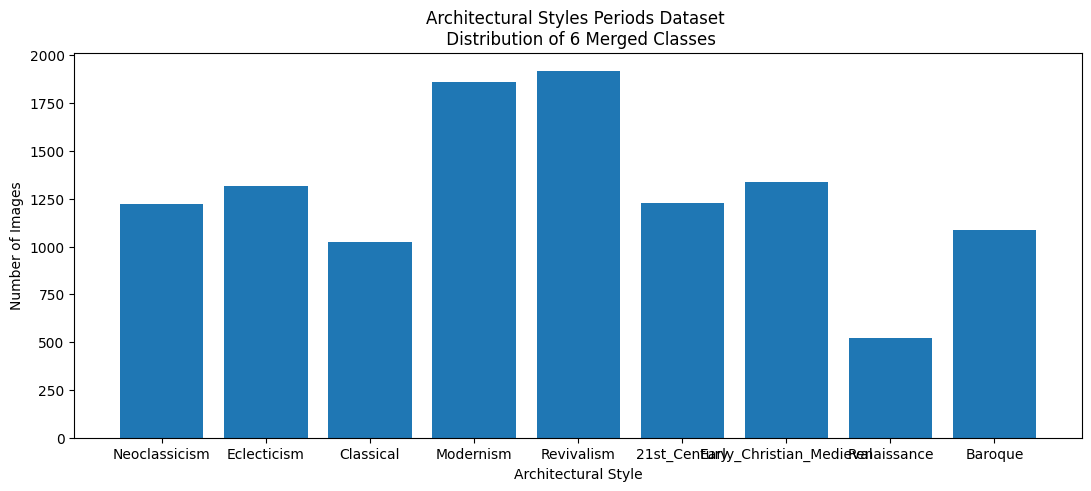

In [10]:
####EDA 1  : 클래스 분포 확인
def showClassDistribution():
  class_img_counts = countImgsPerClass()
  # plt.rcdefaults()
  #pd.DataFrame : 리스트나 딕셔너리 데이터를 표로 만들어줌
  # 딕셔너리의 .items()를 사용해 (키, 값) 쌍의 리스트로 변환
  data_count_table = pd.DataFrame(class_img_counts.items(), columns=['class', 'count'])
  print(data_count_table)

  #plt : 표를 그래프로 시각화
  plt.figure(figsize=(13,5)) #캔버스 크기
  #plt.bar : 막대그래프 (x축, y축)
  plt.bar(data_count_table['class'], data_count_table['count'])

  plt.title("Architectural Styles Periods Dataset \n Distribution of 6 Merged Classes") #건축 양식 이미지 데이터셋 / 6개 건축 양식 클래스별 데이터 분포
  plt.xlabel('Architectural Style') #건축 양식
  plt.ylabel('Number of Images')
  plt.show() # 그래프 출력


###실행
showClassDistribution()

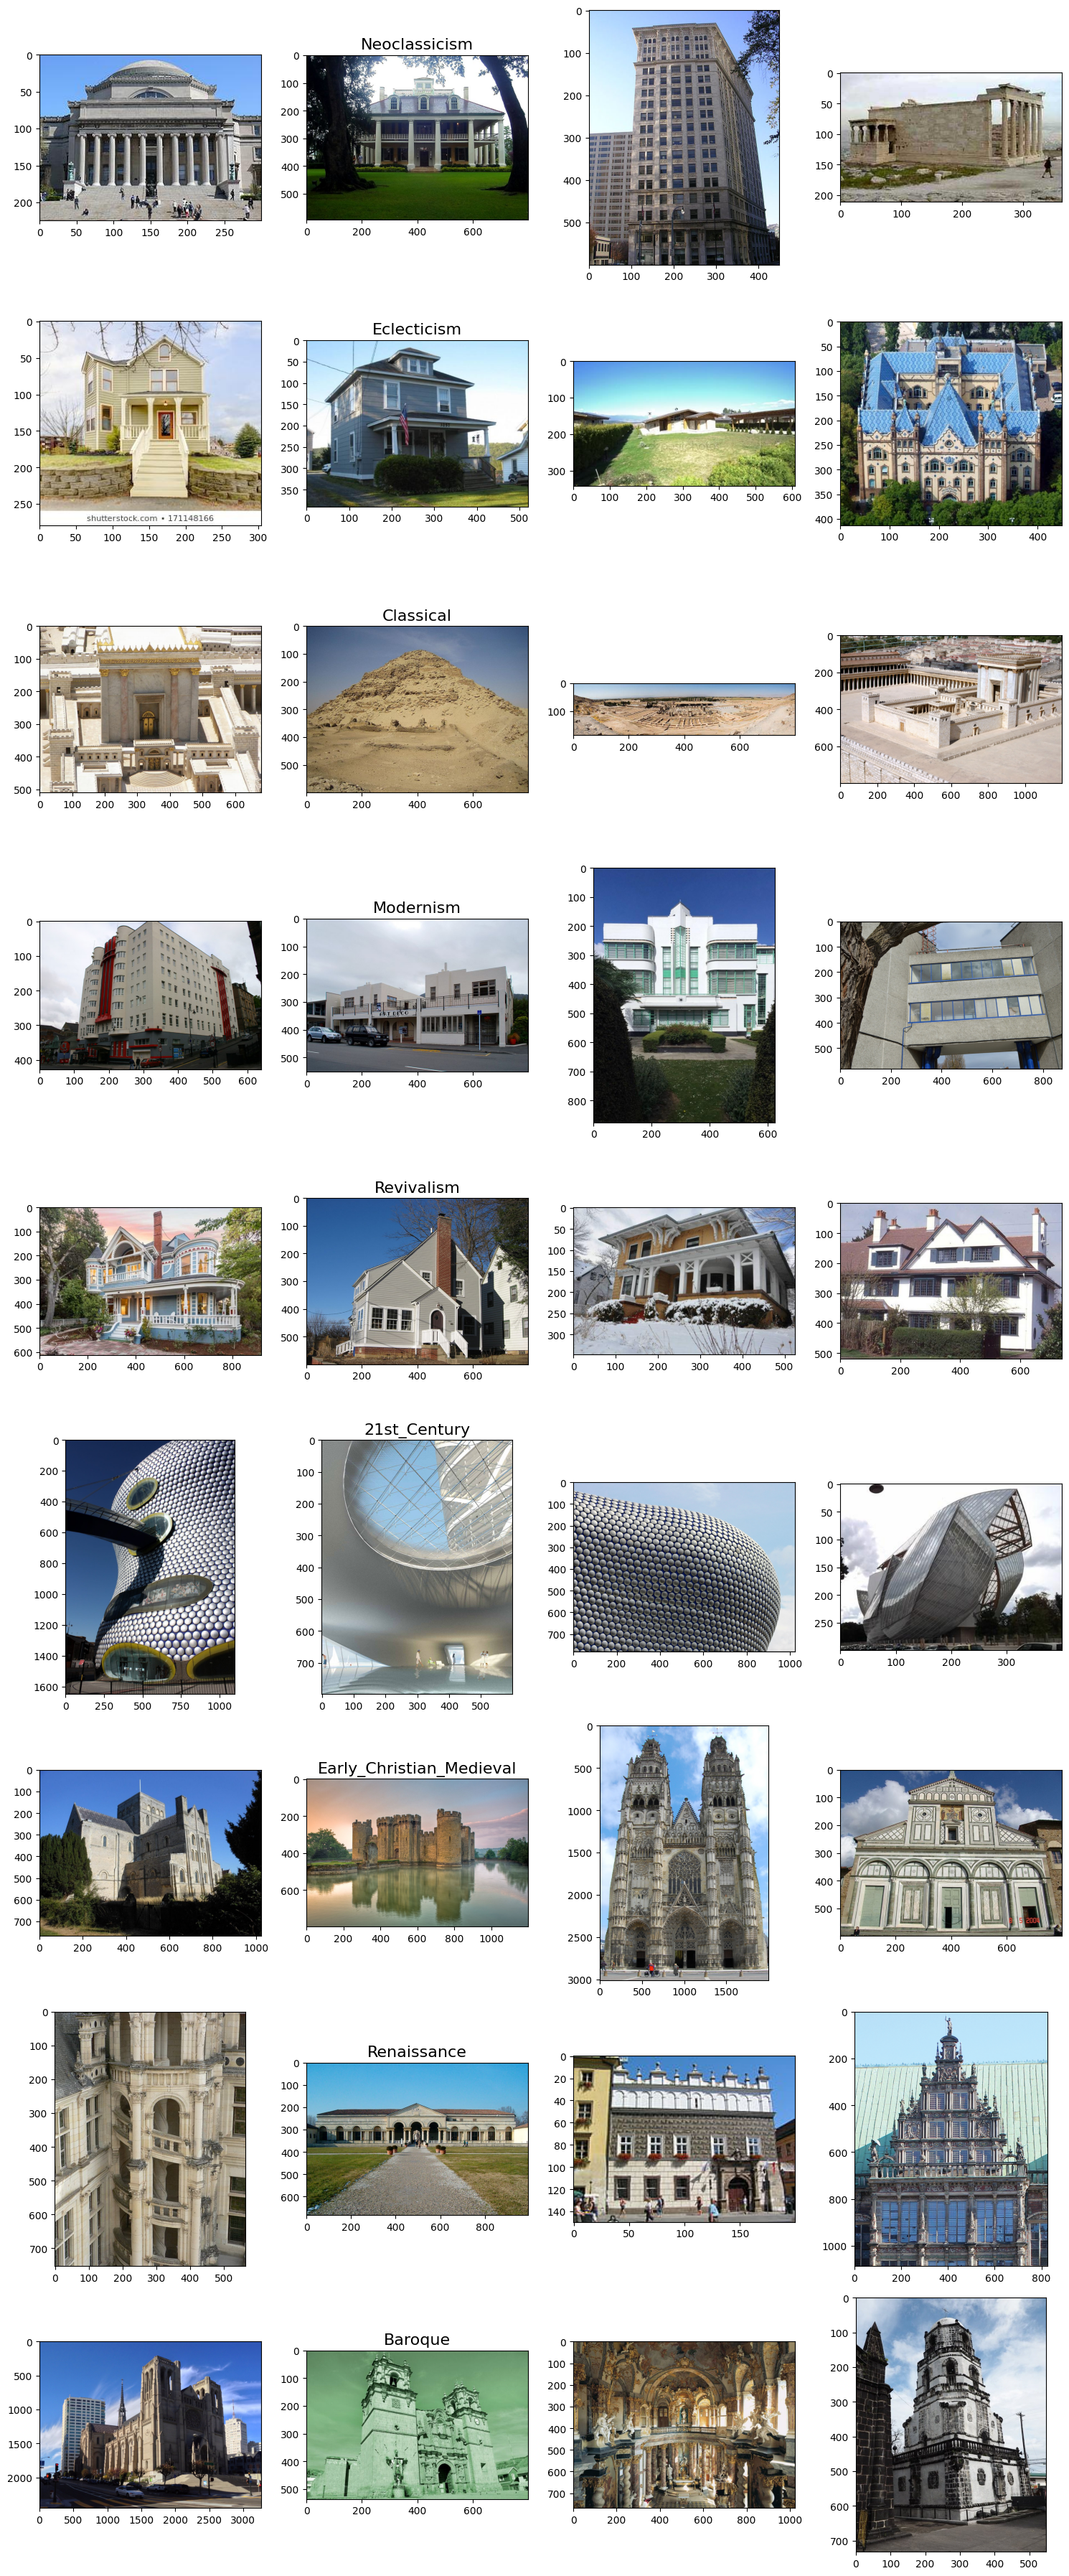

In [11]:
####EDA 2  : 각 클래스별 샘플 이미지 n개씩
def showClassRandomSamples(n):
  # print(merged_data_dir) #/content/data/Merged_dataset/
  class_names =[clas.name for clas in  dataset_path.iterdir()]
  # print(class_names)

  plt.figure(figsize=(15,len(class_names)*n))

  for i, class_name in enumerate(class_names):#enumerate():스트를 돌면서 (순서 인덱스, 값)쌍 반환
    class_path = dataset_path/class_name #ex : ~~/dataset/Classical_Revival
    imgs = [imgfile for imgfile in class_path.iterdir()]
    samples = random.sample(imgs,n)

    for j, img_file in enumerate(samples):
      # print(img_file)
      img = mpimg.imread(img_file)
      plt.subplot(len(class_names),n,i*n+j+1)

      plt.imshow(img)
      if j==1:
        plt.title(class_name, fontsize=16)

  plt.tight_layout()
  plt.show()


###실행
showClassRandomSamples(4)

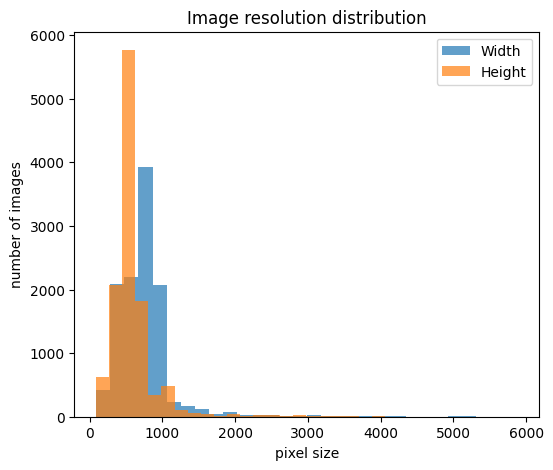

📏 평균 해상도: 764.8 x 609.2
최소 해상도: 90 x 80
최대 해상도: 5892 x 5509


In [12]:
####EDA 3  : 이미지 크기 분포 확인
def showImgSizeDistribution() :
  class_names = [clas.name for clas in  dataset_path.iterdir()]
  img_shapes = []
  error_img = []
  for our_class in class_names:
    folder = os.path.join(dataset_path, our_class) #(예: .../Merged_dataset/21st_Century)
    for img_file in os.listdir(folder):
      img_path = os.path.join(folder, img_file)
      try:
        with Image.open(img_path) as img: #
          img_shapes.append(img.size) #img.size:(width, height) 튜플 반환
      except Exception as e: # Print the error to diagnose
        print(f"Error opening image {img_path}: {e}")
        error_img.append(img_path)


  if not img_shapes: # Check if img_shapes is empty
      print("No image shapes were collected. Please check the error messages above for details.")
  else:
      widths, heights = zip(*img_shapes) #zip(*리스트)는: 리스트 풀어서 끼리끼리 묶어줌 -너비끼리, 높이끼리

      #시각화 - 히스토그램 flt.hist
      plt.figure(figsize=(6,5))
      # bins=30: 데이터를 30개 구간(막대기)으로 나누어 표시
      # alpha=0.7: 막대 투명도를 70%로 설정 (그래프가 겹쳐 보이게 함)
      # label='Width': 범례(legend)에 표시될 이름
      plt.hist(widths, bins=30, alpha=0.7, label='Width')
      plt.hist(heights, bins=30, alpha=0.7, label='Height')

      plt.title('Image resolution distribution')
      plt.xlabel("pixel size")
      plt.ylabel("number of images")
      plt.legend()#범례(label로 지정한 'Width', 'Height')를 표시함

      plt.show()

      print(f"📏 평균 해상도: {np.mean(widths):.1f} x {np.mean(heights):.1f}")
      print(f"최소 해상도: {min(widths)} x {min(heights)}")
      print(f"최대 해상도: {max(widths)} x {max(heights)}")

  if error_img:
      print(f"\n{len(error_img)} images could not be processed:")
      # for err in error_img:
      #     print(err) # Uncomment to print the paths of the problematic images

###실행
showImgSizeDistribution()

# 이미지 수정사항 - 채민 251106 13:00
정규화할 때 알 수 없는 파일이 나타남 -> 미리 이상한 파일들 삭제 후 이미지 수 균일하게 줄이기

In [13]:
problematic_files = []
DATA_DIR = str(dataset_path)

# 허용할 유효한 이미지 확장자 목록
valid_extensions = ['.jpeg', '.jpg', '.png', '.bmp', '.gif']

print(f"'{DATA_DIR}'에서 유효하지 않은 확장자나 숨겨진 파일을 찾습니다...")

for root, dirs, files in os.walk(DATA_DIR):
    for file in files:
        file_path = os.path.join(root, file)

        # 1. 숨겨진 파일(이름이 '.'으로 시작)을 찾기 (예: .DS_Store)
        if file.startswith('.'):
            print(f"---[숨겨진 파일 발견]---: {file_path}")
            problematic_files.append(file_path)
            continue

        # 2. 확장자가 유효한 목록에 없는 파일을 찾기
        ext = os.path.splitext(file)[1].lower()
        if ext not in valid_extensions:
            print(f"---[유효하지 않은 확장자 발견]---: {file_path}")
            problematic_files.append(file_path)

# 3. 발견된 모든 문제 파일 삭제
if problematic_files:
    print(f"\n총 {len(problematic_files)}개의 문제 파일을 삭제합니다...")
    for file_path in problematic_files:
        os.remove(file_path)
    print("삭제 완료.")
else:
    print("확장자가 이상하거나 숨겨진 파일은 없습니다.")

'/content/dataset'에서 유효하지 않은 확장자나 숨겨진 파일을 찾습니다...
확장자가 이상하거나 숨겨진 파일은 없습니다.


In [14]:
# 1. 데이터셋 최상위 경로 (이전과 동일하게 설정)
DATA_DIR = str(dataset_path)

print(f"'{DATA_DIR}'에서 TensorFlow가 읽을 수 없는 파일을 정밀 검사합니다...")
problematic_files = []

# 2. 모든 파일 경로 수집
all_fnames = []
for root, dirs, files in os.walk(DATA_DIR):
    for file in files:
        all_fnames.append(os.path.join(root, file))

print(f"총 {len(all_fnames)}개의 파일을 검사합니다...")

# 3. TensorFlow 함수로 파일 검사
for file_path in all_fnames:
    try:
        # 1. TensorFlow가 파일을 읽는 방식
        img_bytes = tf.io.read_file(file_path)
        # 2. TensorFlow가 이미지를 디코딩하는 방식
        img = tf.io.decode_image(img_bytes)

    except Exception as e:
        # 3. 여기서 오류가 나면 model.fit()에서도 오류 발생
        print(f"---[문제 파일 발견]---: {file_path}")
        print(f"오류: {e}\n")
        problematic_files.append(file_path)

# 4. 발견된 모든 문제 파일 삭제
if problematic_files:
    print(f"\n총 {len(problematic_files)}개의 문제 파일을 삭제합니다...")
    for file_path in problematic_files:
        os.remove(file_path)
    print("삭제 완료.")
else:
    print("TensorFlow 기준으로도 문제가 되는 파일이 없습니다.")

'/content/dataset'에서 TensorFlow가 읽을 수 없는 파일을 정밀 검사합니다...
총 11518개의 파일을 검사합니다...
---[문제 파일 발견]---: /content/dataset/Classical/2293.jpg
오류: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage] name: 

---[문제 파일 발견]---: /content/dataset/Classical/2296.jpg
오류: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage] name: 

---[문제 파일 발견]---: /content/dataset/Classical/2358.jpg
오류: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage] name: 

---[문제 파일 발견]---: /content/dataset/Classical/2250.jpg
오류: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF,

500장 이하로 줄어들 수도 있기 때문에 확인 절차

In [15]:
# 폴더별 이미지 개수 확인 - 딕셔너리 형태 반환
###실행
countImgsPerClass()

{'Neoclassicism': 1225,
 'Eclecticism': 1315,
 'Classical': 1010,
 'Modernism': 1854,
 'Revivalism': 1919,
 '21st_Century': 1224,
 'Early_Christian_Medieval': 1325,
 'Renaissance': 515,
 'Baroque': 1083}

In [16]:
## 이미지 수 균일하게 줄이기.
def reductionFiles(numPerClass=500):
  class_img_counts = countImgsPerClass()
  min_img_counts=min(class_img_counts.values())
  print("파일 삭제 전 : ",class_img_counts)

  if min_img_counts<numPerClass:
    print(f"{numPerClass}보다 적은 클래스가 존재합니다.")
    return
  else:
    for class_dir in dataset_path.iterdir():
      class_all_imgs=[f for f in class_dir.iterdir()
                         if f.is_file() and not f.name.startswith('.')]
      random.shuffle(class_all_imgs)
      files_to_delete = class_all_imgs[numPerClass:]#삭제할 파일(500개 초과분)만 선택
      for img_file in files_to_delete:
        img_file.unlink()
  print("파일 삭제 완료")
  return countImgsPerClass()

###실행
reductionFiles()

파일 삭제 전 :  {'Neoclassicism': 1225, 'Eclecticism': 1315, 'Classical': 1010, 'Modernism': 1854, 'Revivalism': 1919, '21st_Century': 1224, 'Early_Christian_Medieval': 1325, 'Renaissance': 515, 'Baroque': 1083}
파일 삭제 완료


{'Neoclassicism': 500,
 'Eclecticism': 500,
 'Classical': 500,
 'Modernism': 500,
 'Revivalism': 500,
 '21st_Century': 500,
 'Early_Christian_Medieval': 500,
 'Renaissance': 500,
 'Baroque': 500}

# 이미지 수정사항 - 채민 251106 13:00
MobileNetV2에서는 128 * 128 이미지가 표준이어서 이미지 크기 변경


In [17]:
DATA_DIR = str(dataset_path) #/content/data/Merged_dataset
# print(DATA_DIR)
# 이미지 사이즈/배치/seed
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
SEED = 42 #데이터를 나눌 때 사용할 랜덤 시드
AUTOTUNE = tf.data.AUTOTUNE #tf.data 파이프라인의 성능을 자동으로 최적화

#데이터셋 파이프라인 구축 (Train/Val 분리)
train_dataset = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,             # 6개 클래스 폴더가 들어있는 상위 폴더
    labels="inferred",    # 폴더명을 라벨로 사용
    label_mode="categorical",      # 원-핫 인코딩 (다중 클래스 분류용)
    validation_split=0.2, # 전체 데이터 중 20%를 검증용으로 validation
    subset="training",    # "나머지 80% -> 훈련용 데이터 training
    seed=SEED,
    image_size=IMG_SIZE,  # 모든 이미지를 자동 리사이징
    batch_size=BATCH_SIZE
)
val_dataset = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    labels="inferred",    # 폴더명을 라벨로 사용
    label_mode="categorical",      # 원-핫 인코딩 (다중 클래스 분류용)
    validation_split=0.2, # 전체 데이터 중 20%를 검증용으로 validation
    subset="validation",    # "나머지 80% -> 훈련용 데이터 training
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)
# Keras가 폴더명을 기반으로 자동 생성한 클래스 이름들을 확인.
# (0번 = '21st_Century', 1번 = 'Baroque_Rococo', ... 알파벳 순서로 자동 정렬)
class_names = train_dataset.class_names
print("\n--- 클래스 이름 (자동 생성된 라벨 순서) ---")
print(class_names)
# 파이프라인 최적화(캐시/프리패치)
# - 캐시: 반복(epoch) 시 디스크 재읽기 최소화(메모리에 여유가 있으면 좋음)
# - 프리패치: 다음 배치를 미리 준비하여 GPU/CPU 대기시간 단축
train_dataset = train_dataset.cache().prefetch(AUTOTUNE)
val_dataset   = val_dataset.cache().prefetch(AUTOTUNE)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.
Found 4500 files belonging to 9 classes.
Using 900 files for validation.

--- 클래스 이름 (자동 생성된 라벨 순서) ---
['21st_Century', 'Baroque', 'Classical', 'Early_Christian_Medieval', 'Eclecticism', 'Modernism', 'Neoclassicism', 'Renaissance', 'Revivalism']


# 정규화 수정사항 - 채민 251106 01:30
현재 MobileNetV2 모델은 ImageNet으로 사전 훈련할 때 -1 ~ +1 범위로 정규화된 이미지를 사용
-> Rescaling(1./255) 대신 preprocess_input 함수 (MobileNetV2 전용함수)를 사용해야함


In [18]:
# 정규화·증강 레이어 파이프라인에 적용

# def realReadyDataSets():
# train_dataset, val_dataset, class_names=createTrainValDatasets()
###데이터 증강(Augmentation)
#-정규화 레이어: 0~255 픽셀을 0~1로 스케일링
# [수정사항 - 채민] 0~255 픽셀을 -1~+1 범위로 정규화 (MobileNetV2 전용 함수)
# rescale = layers.Rescaling(1./255)
#데이터 증강(Augmentation) 레이어 정의 (학습 데이터에만 적용)
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

data_augmentation = keras.Sequential(   # 'Sequential' 모델을 사용해 증강 기법들을 파이프라인처럼 만든다.
    [                                   # 훈련 중에 실시간으로 이미지를 변형
        layers.RandomFlip("horizontal"),   # 좌우 뒤집기
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),            # 10% 줌 인/아웃
        layers.RandomContrast(0.1),        # 대비 변화
    ],
    name="data_augmentation"# 이름 붙이기
)
## training학습용 : 증강(data_augmentation) -> 정규화(rescale) 적용
train_dataset_ready = (
    train_dataset
    .map(lambda x, y: (preprocess_input(data_augmentation(x)),y), num_parallel_calls=AUTOTUNE) #x:원본이미지, y:원본레이블
    .prefetch(AUTOTUNE)
)
## 검증용 : 정규화(rescale)만! -> [MobileNetV2 정규화만 !]
val_dataset_ready = (
    val_dataset
    .map( lambda x, y: (preprocess_input(x),y), num_parallel_calls=AUTOTUNE)
    .prefetch(AUTOTUNE)
)
print("[OK] 파이프라인 (MobileNetV2 정규화 적용) 준비 완료.")
# return train_dataset_ready, val_dataset_ready, class_names

# 한 배치 꺼내서 모양 확인
print("한 배치 꺼내서 모양 확인")
xb, yb = next(iter(train_dataset_ready))
print("이미지 배치:", xb.shape, xb.dtype)
# 이미지 배치:            예 : (32, 224, 224, 3) <dtype: 'float32'>
# 이미지 배치 (입력 데이터): (배치 크기, 세로px, 가로px, 채널수:rgb) <dtype: 'float32'>
# 의미 : 32장의 224×224 RGB 컬러 이미지

print("라벨 배치 :", yb.shape, yb.dtype)
# 라벨 배치 :            (32, 6) <dtype: 'float32'>
# 라벨 배치 (정답 데이터) : (배치크기, 클래스 수) <dtype: 'float32'>
# 의미 : 9개 클래스 중 해당되는 위치가 1인 one-hot 벡터 ex[0., 0., 0., 0., 1., 0.]

print("정규화 후 최소값: ", tf.reduce_min(xb).numpy())
print("정규화 후 최대값: ", tf.reduce_max(xb).numpy())

[OK] 파이프라인 (MobileNetV2 정규화 적용) 준비 완료.
한 배치 꺼내서 모양 확인
이미지 배치: (32, 128, 128, 3) <dtype: 'float32'>
라벨 배치 : (32, 9) <dtype: 'float32'>
정규화 후 최소값:  -1.0
정규화 후 최대값:  1.0


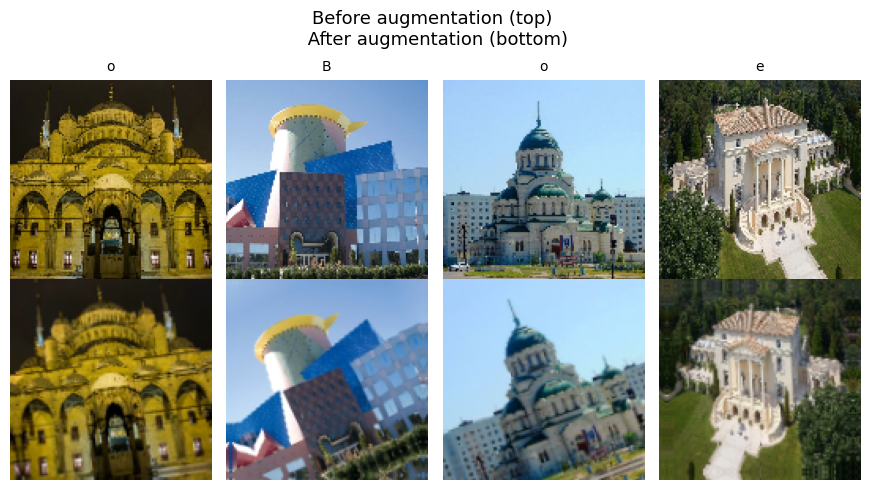

In [19]:
def show_augment_comparison(train_dataset,
                            data_augmentation,
                            class_names=None,
                            max_images=8):
    """
    train_dataset에서 배치 1개를 꺼내 '증강 전/후' 이미지를 8장 비교로 보여줍니다.
    - 위 줄: 증강 전(원본 배치에서 꺼낸 이미지)
    - 아래 줄: 같은 이미지에 data_augmentation을 적용한 결과
    """
    # 배치 하나 추출
    images, labels = next(iter(train_dataset))
    n = min(max_images, images.shape[0])
    images = images[:n]  # (n, H, W, 3)

    # labels가 one-hot이면 argmax로 인덱스 변환
    try:
        label_idx = tf.argmax(labels[:n], axis=1).numpy()
    except Exception:
        # sparse일 수도 있으니 대비
        label_idx = labels[:n].numpy().astype(int).reshape(-1)

    # ----- 증강 적용 (training=True를 명시해서 랜덤 변환 강제) -----
    # 주의: data_augmentation은 정규화 전/후 모두 동작하지만,
    # 보통은 정규화 전 uint8/float32 범위(0~255) 이미지에 적용해도 무방합니다.
    aug_images = data_augmentation(images, training=True)

    # ----- 시각화용 유틸: 값을 0~255로 맞춘 뒤 uint8로 캐스팅 -----
    def to_uint8(x):
        x = tf.convert_to_tensor(x, dtype=tf.float32)
        # 만약 0~1 범위라면 255 스케일, 0~255면 그대로 클리핑만
        mx = tf.reduce_max(x)
        x = tf.where(mx <= 1.0, x * 255.0, x)
        x = tf.clip_by_value(x, 0.0, 255.0)
        return tf.cast(x, tf.uint8).numpy()

    vis_orig = to_uint8(images)
    vis_aug  = to_uint8(aug_images)

    # ----- 플로팅 -----
    plt.figure(figsize=(2.2*n, 5))
    # 윗줄: 원본
    for i in range(n):
        plt.subplot(2, n, i+1)
        plt.imshow(vis_orig[i])
        title = None
        if class_names is not None:
            title = class_names[label_idx[i]]
        if title:
            plt.title(title, fontsize=10)
        plt.axis("off")
    # 아랫줄: 증강 후
    for i in range(n):
        plt.subplot(2, n, n + i + 1)
        plt.imshow(vis_aug[i])
        plt.axis("off")
    plt.suptitle("Before augmentation (top) \n After augmentation (bottom)", fontsize=13)
    plt.tight_layout()
    plt.show()
show_augment_comparison(train_dataset,data_augmentation,'Baroque_Rococo',4 )

# MobileNetV2 설정 - 채민


In [20]:
# 1. 입력 설정
INPUT_SHAPE = (128, 128, 3)
NUM_CLASSES = 9

# 2. MobileNetV2 세팅
base_model = tf.keras.applications.MobileNetV2(
    input_shape = INPUT_SHAPE,
    include_top = False, # 모델의 마지막 분류층 1000개 제외
    weights = 'imagenet' # ImageNet 사전 훈련 가중치 사용
)

# 3. Trainable = False -> 사전 훈련된 가중치 동결
base_model.trainable = False

# 4. 분류기 추가 - 동결화 실험을 위한 베이스 모델 설정
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# 5. 모델 컴파일
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 6. 모델 요약
model.summary()

# 7. 모델 훈련 (동결시)
EPOCHS = 20

history = model.fit(
    train_dataset_ready,
    validation_data = val_dataset_ready,
    epochs = EPOCHS
)

print("--- 동결 훈련 완료 ---")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,113 (9.24 MB)

 Trainable params: 165,129 (645.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 97s 804ms/step - accuracy: 0.2567 - loss: 2.1601 - val_accuracy: 0.5122 - val_loss: 1.3561
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 65s 575ms/step - accuracy: 0.4463 - loss: 1.5672 - val_accuracy: 0.5489 - val_loss: 1.2406
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 81s 569ms/step - accuracy: 0.4968 - loss: 1.3936 - val_accuracy: 0.5711 - val_loss: 1.2027
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 84s 589ms/step - accuracy: 0.5271 - loss: 1.3135 - val_accuracy: 0.5733 - val_loss: 1.1892
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 75s 665ms/step - accuracy: 0.5322 - loss: 1.2827 - val_accuracy: 0.5711 - val_loss: 1.2001
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 75s 665ms/step - accuracy: 0.5540 - loss: 1.2322 - val_accuracy: 0.5511 - val_loss: 1.2082
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 70s 618ms/step - accuracy: 0.5660 - loss: 1.2299 - val_accuracy: 0.5933 - val_loss: 1.1381
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 87s 661ms/step - accuracy: 0.5899 - loss: 1

--- 동결 훈련 결과 ---


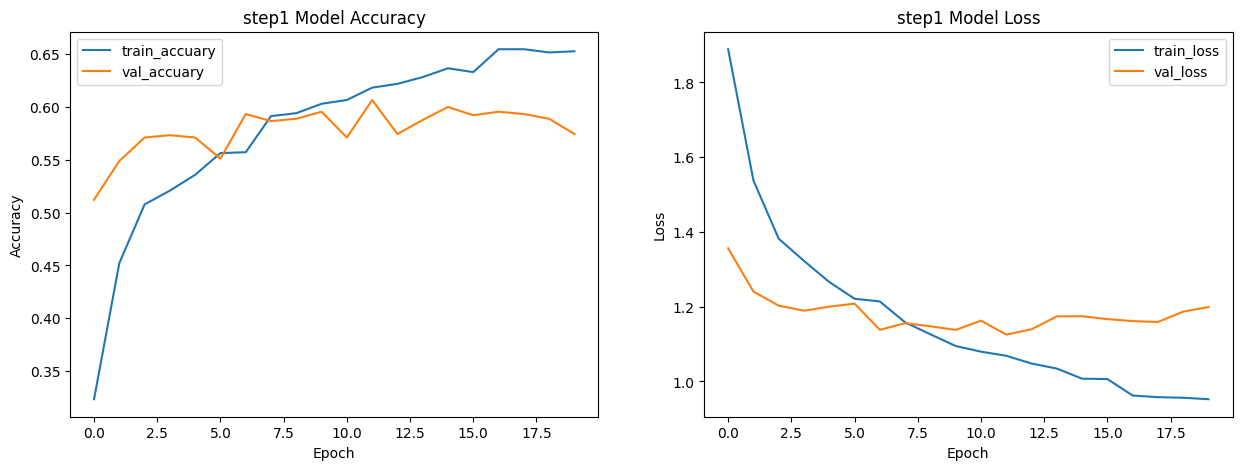

In [21]:
# 동결 훈련 결과 시각화
import matplotlib.pyplot as plt

print("--- 동결 훈련 결과 ---")

plt.figure(figsize=(15,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_accuary')
plt.plot(history.history['val_accuracy'], label='val_accuary')
plt.title('step1 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('step1 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 분류기 헤드 구조/Dropout 비교 실험 및 최종 모델 선택, 1차 학습 진행 - 채정


In [22]:
## 1. 실험 준비

from tensorflow.keras import callbacks, layers, models
import os
import numpy as np

INPUT_SHAPE = (128, 128, 3)
NUM_CLASSES = 9

# 실험용 모델 생성 함수 (헤드 구조/Dropout 실험용)
def build_model_head(head_units=128, dropout_rate=0.5, lr=0.001):   # 입력 없을 때의 디폴트 값
    # 백본 MobileNetV2 다시 불러오기 (동일한 설정)
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=INPUT_SHAPE,
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False  # 앞부분과 동일하게 동결

    inputs = layers.Input(shape=INPUT_SHAPE)
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(head_units, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

    model = models.Model(inputs, outputs)   # 입력 -> 출력 연결한 모델 완성

    # 모델 컴파일
    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
## 2. 헤드 구조/Dropout 비교 실험

import random
import tensorflow as tf

# 재현성(결과 고정)을 위한 랜덤 시드 설정
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

# 실험할 조합(설정) 목록
configs = [
    ("H128 and D0.5", 128, 0.5),
    ("H128 and D0.3", 128, 0.3),
    ("H256 and D0.5", 256, 0.5),
]

exp_results = []    # 결과 저장용 리스트
exp_histories = {}  # 학습 로그 저장용 딕셔너리

# 실험
for name, units, drop in configs:
    print(f"\n=== 헤드 구조/Dropout: {name} ===")

    # 해당 조합으로 실험 모델 생성
    m = build_model_head(head_units=units, dropout_rate=drop)

    # 5epoch씩만 짧게 돌려서 실험
    h = m.fit(
        train_dataset_ready,
        validation_data=val_dataset_ready,
        epochs=5,
        verbose=0
    )

    best_val = max(h.history["val_accuracy"])     # 이 실험에서 최고 val_accuracy 기록
    exp_results.append((name, best_val))          # best_val 결과 리스트에 저장
    exp_histories[name] = h.history               # 학습 로그 저장
    print(f"  best val acc: {best_val:.4f}")      # 해당 조합의 best_val 출력

# 실험 최종 결과 출력
print("\n<헤드 구조/Dropout 실험 결과>")
print(f"{'Configuration':<25} {'Best Val Accuracy':<20}")
print("-" * 45)
for name, acc in exp_results:
    print(f"{name:<25} {acc:<20.4f}")

print("\n--- 헤드 구조/Dropout 실험 완료 ---")


=== 헤드 구조/Dropout: H128 and D0.5 ===


In [ ]:
## 3. 실험 결과 시각화

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# (1) val_accuracy 곡선 비교
plt.figure()
for name, hist in exp_histories.items():
    epochs = range(1, len(hist["val_accuracy"]) + 1)
    plt.plot(epochs, hist["val_accuracy"], label=name)

plt.xlabel("epoch")
plt.ylabel("val_accuracy")
plt.title("Accuracy by Head Structure and Dropout")
plt.legend()

plt.xticks(range(1, len(hist["val_accuracy"]) + 1))

plt.show()

# (2) best val_accuracy 막대 그래프
names = [r[0] for r in exp_results]
vals  = [r[1] for r in exp_results]

fig, ax = plt.subplots()
ax.bar(names, vals)

ymin = min(vals) - 0.01
ymax = max(vals) + 0.01
ax.set_ylim(ymin, ymax)

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))

ax.set_xlabel("Head Structure / Dropout Setting")
ax.set_ylabel("Best Val Accuracy (5 epochs)")
ax.set_title("Performance Comparison by Head Structure and Dropout")
plt.xticks(rotation=20)

plt.show()

In [ ]:
## 4. 최종 모델 결정 및 학습 (H128 and D0.3)

import os

os.makedirs("runs", exist_ok=True)    # 최종 모델 학습 중 저장되는 파일들을 담을 폴더 - content 폴더에서 확인 가능

final_model = build_model_head(head_units=128, dropout_rate=0.3, lr=0.001)   # 실험에서 가장 성능이 좋았던 조합(설정)

# 콜백 세팅
cbs = [
    callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    callbacks.ModelCheckpoint("runs/best_head.keras", monitor='val_accuracy', mode='max', save_best_only=True, save_weights_only=False),
    callbacks.CSVLogger("runs/train_log_head.csv")
]

# 최종 모델 학습
FINAL_EPOCHS = 20
final_history = final_model.fit(
    train_dataset_ready,
    validation_data=val_dataset_ready,
    epochs=FINAL_EPOCHS,
    callbacks=cbs,
    verbose=1
)

print("--- 최종 헤드 학습 완료 ---")